In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# Q8. This question involves the use of simple linear regression on the Auto data set.

In [2]:
auto = pd.read_csv(r'C:\Users\Kushal Garg\ML\Introduction to statistical learning\Datasets\Auto.csv')

print(auto.shape)
auto.head()


(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## (a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:
### i. Is there a relationship between the predictor and the response?
### ii. How strong is the relationship between the predictor and the response?
### iii. Is the relationship between the predictor and the response positive or negative?
### iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [3]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [4]:
auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
auto['horsepower']=auto['horsepower'].replace('?', np.nan)
auto=auto.dropna()
auto.shape

(392, 9)

In [7]:
auto['horsepower']=auto['horsepower'].astype(np.int64)

In [8]:

import statsmodels.api as sm
X = auto['horsepower']
X = sm.add_constant(X)     
y = auto['mpg']
result=sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           7.03e-81
Time:                        00:31:42   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

#### i. Is there a relationship between the predictor and the response?

Yes, the low P-value associated with the t-statistic for horsepower suggests so.

#### ii. How strong is the relationship between the predictor and the response?

For a unit increase in horsepower, our model predicts mpg will decrease by -0.1578. So for example, increasing horsepower by 10 is expected to decrease efficiency by -1.578 mpg.

#### iii. Is the relationship between the predictor and the response positive or negative?

Negative

In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.predict([[1,98]])

array([24.46707715])

#### iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

24.467 mpg

## (b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.

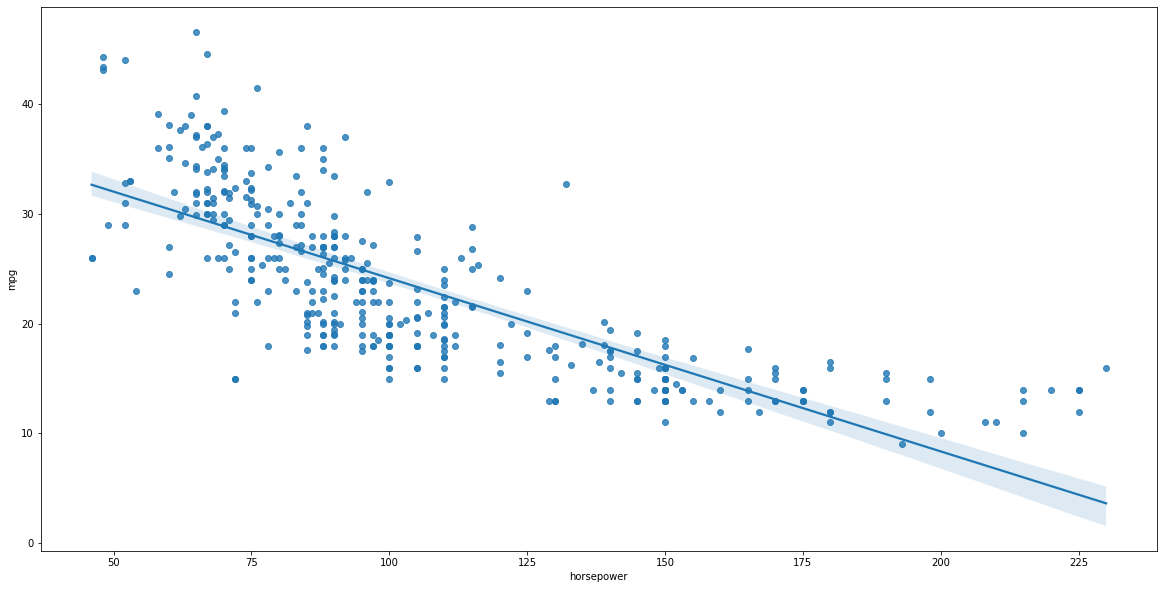

In [11]:
plt.figure(figsize=(20,10))
sns.regplot(auto['horsepower'],auto['mpg'])


## (c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

#### For code reference and much understanding about each plot use the link below .
https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/
#### For theoretical knowledge about diagnostic plots refer to the snapshot below.
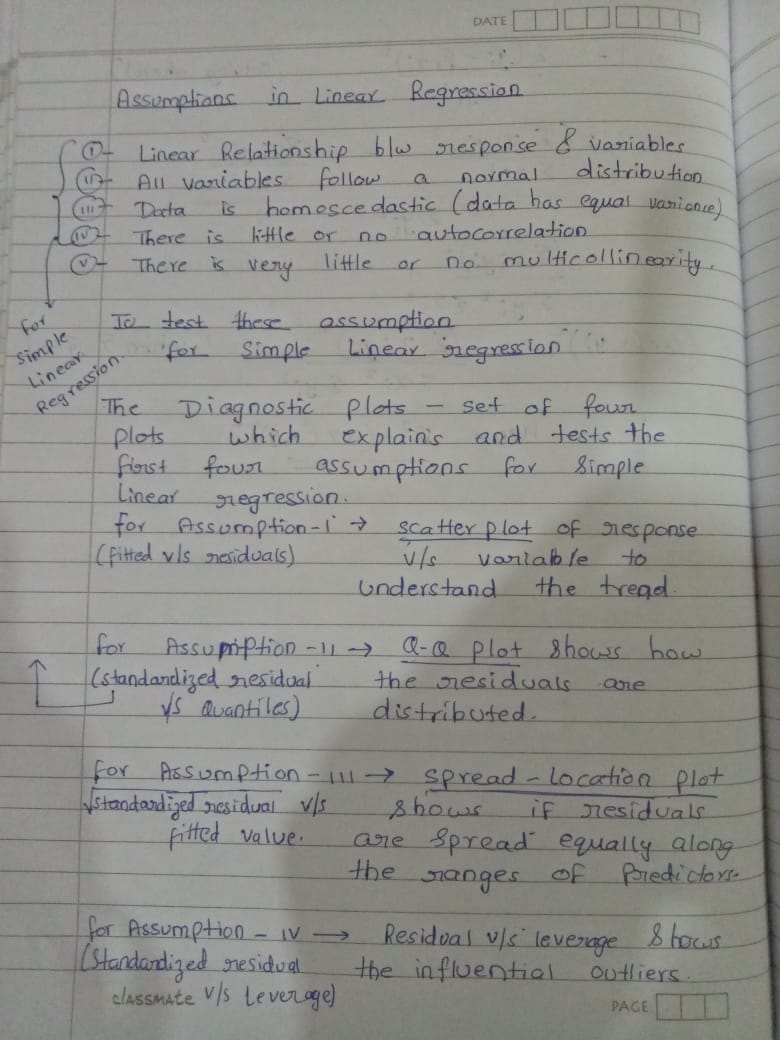

Text(0.5, 1.0, 'Residual Plot')

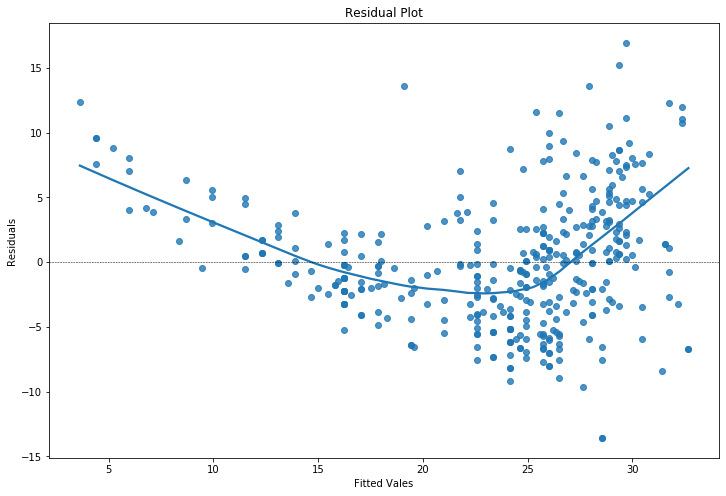

In [14]:
plt.figure(figsize = (12,8))
fitted_y=result.fittedvalues
residuals=result.resid

sns.regplot(fitted_y,residuals,lowess=True)
plt.axhline(y = 0,linewidth = 0.5,linestyle = 'dashed',color = 'black')
plt.xlabel('Fitted Vales')
plt.ylabel('Residuals')
plt.title('Residual Plot')

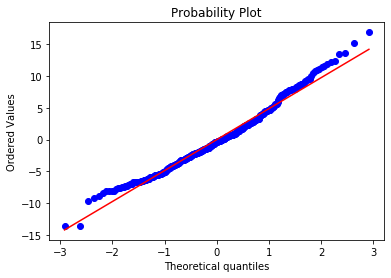

In [20]:
from scipy import stats
ax=stats.probplot(result.resid, dist='norm',plot=plt)

Text(0.5, 1.0, 'Scale-Location Plot ')

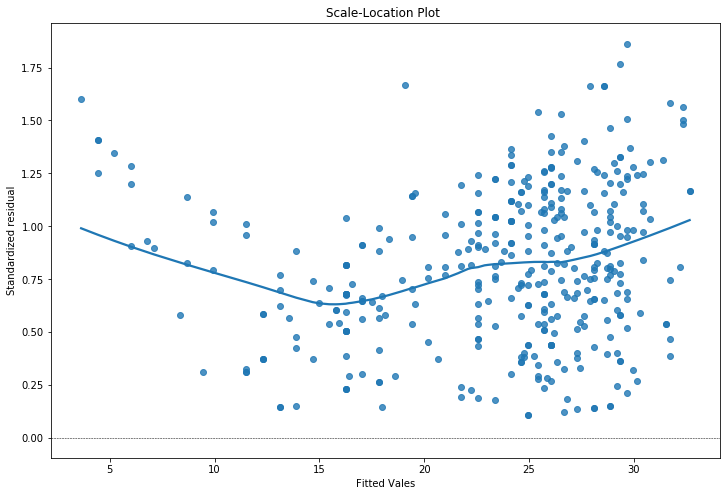

In [23]:
plt.figure(figsize = (12,8))
# normalized residuals
model_norm_residuals = result.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

sns.regplot(fitted_y,model_norm_residuals_abs_sqrt,lowess=True)
plt.axhline(y = 0,linewidth = 0.5,linestyle = 'dashed',color = 'black')
plt.xlabel('Fitted Vales')
plt.ylabel('Standardized residual')
plt.title('Scale-Location Plot ')

Text(0.5, 1.0, 'Residual-Leverage Plot ')

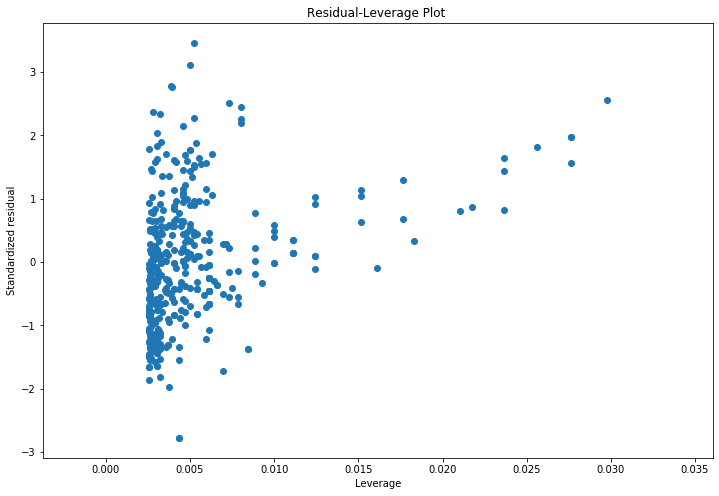

In [35]:
plt.figure(figsize = (12,8))

# leverage, from statsmodels internals
model_leverage = result.get_influence().hat_matrix_diag

plt.scatter(model_leverage, model_norm_residuals)

plt.xlabel('Leverage')
plt.ylabel('Standardized residual')
plt.title('Residual-Leverage Plot ')